<a href="https://colab.research.google.com/github/FilaPuspitaSari/PengolahanCitra/blob/main/1stWeekTasks/Project_G_211_22_0009_G_211_22_0066.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Pengolahan Citra: Klasifikasi Jenis Kelamin Berdasarkan Citra Telapak Tangan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.listdir('/content/drive/MyDrive')


['IMG-20250210-WA0017.jpg',
 'G.211.22.0066-Amanda Putri Allivia.jpg',
 'Bukti transfer-G.211.22.0066-Amanda Putri Allivia.jpg',
 'Mid Test_G.211.22.0066_Amanda Putri Allivia.pdf',
 'SMA',
 'Vocab',
 'Task 3 (Structure & Written Expression).gdoc',
 'Task 4 (Reading) (1).gdoc',
 'Task 4 (Reading).gdoc',
 'FINAL TEST (1).gdoc',
 'FINAL TEST.gdoc',
 'Final Test_G.211.22.0066_Amanda Putri Allivia.pdf',
 'DSC_8884+.jpg',
 'Amanda Putri A..jpg',
 'KRS_G211220066_20221_24022023.pdf',
 'IMG-20230224-WA0000.jpg',
 'G.211.22.0066.jpg',
 'T2 PerWeb_G.211.22.0066_Amanda Putri Allivia.pdf',
 'Makalah Pernikahan Siri_G.211.22.0066_Amanda Putri Allivia.pdf',
 'P.Web_Form_G.211.22.0066_Amanda Putri Allivia.pdf',
 'Screenshot_20230514_103406 (3).jpg',
 'Screenshot_20230514_103406 (2).jpg',
 'Screenshot_20230514_103406 (1).jpg',
 'Screenshot_20230514_103406.jpg',
 'Resume.gdoc',
 'P11_T10_Reading Diagnostik Test_G.211.22.0066_Amanda Putri Allivia.pdf',
 'Pem.Web_Resume_G.211.22.0066_Amanda Putri Allivia

In [ ]:
os.listdir('/content/drive/MyDrive/palm_dataset')


['train', 'val']

In [ ]:
os.listdir('/content/drive/MyDrive/palm_dataset/train')


['cowok', 'cewek']

**FIKS**

**1. Problem Definition (Identifikasi Masalah)** **teks tebal**

In [ ]:
Tahap identifikasi masalah bertujuan untuk merumuskan permasalahan yang akan diselesaikan menggunakan pendekatan deep learning.
Pada penelitian/proyek ini, permasalahan yang diangkat adalah #klasifikasi jenis kelamin (laki-laki dan perempuan) berdasarkan citra telapak tangan#

Permasalahan ini dikategorikan sebagai permasalahan klasifikasi citra biner, karena hanya terdiri dari dua kelas. Hasil dari tahap ini digunakan untuk menentukan
jenis model, fungsi aktivasi pada layer output, serta fungsi loss yang digunakan pada proses pelatihan.

**2. Data Preparation (Persiapan Data)**

In [ ]:
Tahap persiapan data bertujuan untuk menyiapkan data agar dapat diproses oleh model deep learning. Data citra mentah umumnya memiliki variasi ukuran,
intensitas cahaya, dan orientasi, sehingga perlu dilakukan proses preprocessing.

Pada penelitian ini, dilakukan beberapa tahapan persiapan data, yaitu:

1. Normalisasi nilai piksel
2. Data augmentation untuk mengatasi keterbatasan jumlah data
3. Pembagian data menjadi data latih (training) dan data validasi (validation)

Struktur Dataset:
palm_dataset/
 ├── train/
 │    ├── cowok/
 │    └── cewek/
 └── val/
      ├── cowok/
      └── cewek/

Pembagian data:
1. Data latih (training) → 23 gambar
2. Data validasi (validation) → 6 gambar

In [ ]:
#Implemetasi Kode-Preprocessing#

from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224) #ukuran gambar yang digunakan MobileNetV2
batch_size = 4 #jumlah gambar yang diproses dalam satu iterasi

train_datagen = ImageDataGenerator(
    rescale=1./255, #normalisasi
    rotation_range=10, #rotasi acak ±10°
    zoom_range=0.1, #zoom acak
    horizontal_flip=True #membalik gambar secara horizontal
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)


In [ ]:
#Implementasi Kode – Data Loader#
train_generator = train_datagen.flow_from_directory( #membaca gambar berdasarkan nama folder
    '/content/drive/MyDrive/palm_dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical' #label diubah menjadi one-hot encoding
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/palm_dataset/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 23 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


**3. Model Architecture Selection**

In [ ]:
Pada tahap ini dilakukan pemilihan arsitektur model yang sesuai dengan karakteristik data dan kompleksitas permasalahan. Karena data berupa citra,
maka dipilih Convolutional Neural Network (CNN) sebagai arsitektur utama.

Model MobileNetV2 dipilih karena:

1. Memiliki kompleksitas rendah
2. Efisien secara komputasi
3. Telah terbukti efektif untuk transfer learning
4. Cocok untuk dataset berukuran kecil


**4. Model Construction (Layer-level)**

In [ ]:
Tahap konstruksi model bertujuan untuk membangun arsitektur jaringan saraf secara rinci. Pada tahap ini, model pretrained dimodifikasi dengan
menambahkan layer klasifikasi sesuai dengan kebutuhan permasalahan.

In [ ]:
#Implementasi Kode – Konstruksi Model#

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    weights='imagenet', #menggunakan bobot pretrained
    include_top=False, #menghapus layer klasifikasi bawaan
    input_shape=(224, 224, 3) #ukuran input gambar
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x) #merangkum fitur
x = Dense(128, activation='relu')(x) #layer pembelajaran
output = Dense(2, activation='softmax')(x) #klasifikasi dua kelas

model = Model(inputs=base_model.input, outputs=output)

**5. Training Pipeline Setup**

In [ ]:
Tahap training pipeline setup bertujuan untuk mengonfigurasi proses pelatihan model. Pada tahap ini ditentukan algoritma optimisasi,
fungsi loss, dan metrik evaluasi yang digunakan.

In [ ]:
#Implementasi Kode – Compile Model#

model.compile(
    optimizer='adam', #optimizer adaptif
    loss='categorical_crossentropy', #cocok untuk multi-kelas
    metrics=['accuracy'] #metrik evaluasi
)


**6. Transfer Learning**

In [ ]:
Transfer learning diterapkan dengan memanfaatkan bobot pretrained dari MobileNetV2 yang telah dilatih menggunakan dataset ImageNet.
Dengan membekukan bobot pada base model, pengetahuan yang telah dipelajari sebelumnya dapat digunakan untuk menyelesaikan permasalahan baru
tanpa perlu melatih model dari awal.

Secara konseptual, transfer learning merupakan tahap tersendiri. Namun secara implementasi, tahap ini terintegrasi dalam proses konstruksi model.

Pada project ini, transfer learning diterapkan dengan:
  1.Memanfaatkan MobileNetV2 pretrained
  2.Membekukan base model

**7. Training the Model**

In [ ]:
Tahap pelatihan model merupakan proses di mana model melakukan pembelajaran berdasarkan data latih. Pada tahap ini bobot model
diperbarui secara iteratif untuk meminimalkan nilai loss.

In [ ]:
#Implementasi Kode – Training#
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 887ms/step - accuracy: 0.5633 - loss: 1.4957 - val_accuracy: 0.5000 - val_loss: 0.6749
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.6022 - loss: 1.1654 - val_accuracy: 0.3333 - val_loss: 0.8193
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 459ms/step - accuracy: 0.7205 - loss: 0.5342 - val_accuracy: 0.5000 - val_loss: 0.8889
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.6975 - loss: 0.5276 - val_accuracy: 0.8333 - val_loss: 0.5695
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - accuracy: 1.0000 - loss: 0.2638 - val_accuracy: 0.6667 - val_loss: 0.4944
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 553ms/step - accuracy: 1.0000 - loss: 0.2116 - val_accuracy: 0.8333 - val_loss: 0.4314
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 721ms/step - accuracy: 1.0000 - loss: 0.1430 - val_accuracy: 0.8333 - val_loss: 0.4402
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 442ms/step - accuracy: 1.0000 - loss: 0.0946 - val_accuracy: 0.8333 - val_loss

In [ ]:
##Hasil
1. Akurasi training mencapai 100%
2. Akurasi validasi mencapai ±83%

**8. Evaluation (Evaluasi Model)**

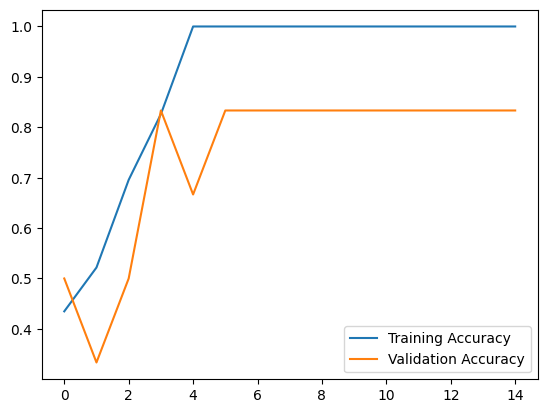

In [ ]:
#Implementasi Kode – Visualisasi Akurasi#
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


**KESIMPULAN**

In [ ]:
Berdasarkan tahapan yang telah dilakukan, sistem deep learning berbasis transfer learning menggunakan MobileNetV2 mampu melakukan klasifikasi jenis kelamin
berdasarkan citra telapak tangan. Pembagian tahapan secara konseptual dan implementatif memberikan pemahaman yang sistematis terhadap proses pengembangan model
deep learning.

In [ ]:
Model deep learning berbasis transfer learning menggunakan MobileNetV2 berhasil
melakukan klasifikasi jenis kelamin berdasarkan citra telapak tangan dengan akurasi yang baik.